In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# OOP

## Recap

  - Encapsulation: grouping data and methods that work on that data. 
    - When initiating an instance, some data including parameters are passed to the constructor. The output of the constructor is an object that has some data and methods that work on that data.
  - Instance: an object that is created from a class -- a model under a special set of paramters values (values are given). 
    - An instance has attributes and methods -- instance attributes (properties) and instance methods.
  - Composition: a class's instance can have instances of other classes as attributes. `def __init__(self, other_class_instance): self.other_class_instance = other_class_instance`.
    - A class can have instance attributes that are instances of other classes. 
    - A class can have instance methods that use instances of other classes as parameters.

寫一個instance 
- instace中的係數已經是被決定 class中的instace 是一個小寫的東西

In [ ]:
class Consumer_LogUtility:
#### 一個基礎的消費者需要的參數
    def __init__(self, beta):
        self.beta = beta
    def foc_c(self, knext: float, w: float, R: float): # (23.6b)
        """
        First order condition of the consumer's problem
        (knext, w, R)
        """
        return knext - (self.beta/(1+self.beta))*w

class Producer_cobbDouglas:
    def __init__(self, alpha):
        self.alpha = alpha
    def foc_l(self, k, w, l=1): # (23.9)
        """ 
        FOC with respect to labor
        (k, l, w)
        """
        return (1-self.alpha)*(k/l)**self.alpha - w
    def foc_k(self, k, R, l=1): # (23.9)
        """
        FOC with respect to capital
        (k, l, R)
        """
        return self.alpha*(l/k)**(1-self.alpha) - R


In [ ]:
consumer = Consumer_LogUtility(beta=0.9)    
producer = Producer_cobbDouglas(alpha=0.33) 
###兩個是 instance  不是繼承關係 大寫 Consumer_LogUtility     

>一個可以連續可以微分的函數特性 
- 一個log function 可以利用這個連續可微分的函數特性 
- 為一個繼承的概念

In [ ]:
class OLGMarket:
    ### market the instaces are consumers and producer
    def __init__(self, consumer, producer, k0):
        self.consumer = consumer # composite 1
        self.producer = producer # composite 2
        self.k0 = k0
        self.k = k0
        self.equilibrium_dynamics = [[k0, None, None]]
    def generate_onePeriod_equilibrium(self):
        """
        return a tuple of (knext, w, R)
        and track the dynamics in self.equilibrium_dynamics
        """ # docstring: documentation string
        
        alpha = self.producer.alpha
        beta = self.consumer.beta

        w = (1-alpha)*self.k**alpha
        R = alpha*(self.k)**(alpha-1)
        knext = (beta/(1+beta))*w

        # keep track of the dynamics
        self.equilibrium_dynamics[len(self.equilibrium_dynamics)-1][1] = w
        self.equilibrium_dynamics[len(self.equilibrium_dynamics)-1][2] = R
        self.equilibrium_dynamics.append([knext, None, None])

        # set the market time to the next period
        self.k = knext
        return (knext, w, R)
    
    def clear_equilibrium_dynamics(self):
        self.equilibrium_dynamics = [[self.k0, None, None]]
        self.k = self.k0



In [ ]:
market = OLGMarket(consumer, producer, k0=0.1)  
market

In [ ]:
import  numpy as np 
#### generate the a contructor 
def Draw(mu, sigma):
    def draw(size):
        return np.random.normal(mu, sigma, size)   
    return draw

## Design a prototype

Designing a class all at once is daunting. We can start with only the properties (attributes) of the class and then add methods as we go, i.e. only setup a prototype with only `def __init__(...)`.


Consider the following AR(k) model:

$$
y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_k y_{t-k} + \epsilon_t
$$

where $\epsilon_t \sim N(0, \sigma^2)$. eplsilon is the random function.

Suppose we are interested in simulate a random path of $y_t$ for $t=1,2,\ldots,T$, with $Y_0=[y_0, y_{-1}, \ldots, y_{-k+1}]$ given.

In [ ]:
import numpy as np
### ypast is a former of y
class AR:
    def __init__(self, *phi, epsilon, Y0):
        self.phi = np.array(phi)
        self.epsilon = epsilon
        self.Y0 = np.array(Y0)
        self.memory = np.array([])
        self.YPast = np.array(self.Y0)

#### 基礎故事架構 接續method


- We will talk about `*phi` later.
- epsilon is a function to generate random numbers. (An example will follow.)
- We start from `t=1`, for `y_1` we need `y_0` and `y_{t-k}` to kick start our simulation. `Y0` is a list of $y_0, y_{-1}, \ldots, y_{-k+1}$.  
- `memory` is to memorize simulated process so far (detail will follow).
- `YPast` is refering to $y_{t-1}, y_{t-2}, \ldots, y_{t-k}$ for a given `t>0`.

Consider the following random process:
$$
\begin{aligned}
y_t =0.8 y_{t-1} - 0.35 y_{t-2}  + \epsilon_t \\
Y_0= [0, 0]\\
\epsilon_t \sim N(0, 0.4^2) \\
\end{aligned}
$$

with $y_{0}=y_{-1}=0$

The above process fundamentals are determined by:

- `phi = [0.8, -0.35]`
- `Y0 = [0, 0]`, and
- `epsilon` that can generate random numbers from $N(0, 0.4^2)$.

### An instance

In [ ]:
import numpy as np

def Epsilon(mu, sigma):
    def draw(size):
        return np.random.normal(mu, sigma, size)
    return draw
    
epsilon = Epsilon(0, 0.4)
epsilon(10)

In [ ]:
epsilon(1)
epsilon(10)

In [ ]:
ar = AR(0.8, -0.35, epsilon=epsilon, Y0=[0,0])

In [ ]:
# an instance of the basic prototype of a class
ar.phi
ar.epsilon(10)
ar.Y0
ar.YPast

In [ ]:
import numpy as np
### ypast is a former of y
class AR:
    def __init__(self, *phi, epsilon, Y0):
        self.phi = np.array(phi)
        self.epsilon = epsilon
        self.Y0 = np.array(Y0)
        self.memory = np.array([])
        self.YPast = np.array(self.Y0)

import numpy as np
def Epsilon(mu, sigma):
    def draw(size):
        return np.random.normal(mu, sigma, size)
    return draw
    
epsilon = Epsilon(0, 0.4)


ar = AR(phi=[0.8, 0.3], epsilon=epsilon, Y0=[0,0])



## Packing

Packing is to pack all non-key-value-pair argument values into a tuple. 

In [ ]:
def test(*args, epsilon):
    print(args)
    print(epsilon)

test(1,2,3, epsilon="Hi")
##### * 沒有key 的input 會被集結在一起當成一個向量 tuple 
### 簡單把一些相同的參數集結在一起  

In [ ]:
def fun(a,b):
    return a+b
fun(1,2)
fun(a=1, b=2)   ###key value pair 明確指定參數哪個對應哪個

In [ ]:
### ces  packing 缺點
def untilty(x1,x2,):
    return min(x1,x2) 
untilty(1,2)    


In [ ]:
##不管有幾個參數都可以用    
def untilty(*X):
    return min(X) 
untilty(1,2,3,5 ,6,7,8,9,10) 

> In `test(1,2,3, epsilon="Hi")`: `1,2,3` are non-key-value inputs, and `epsilon="Hi"` is a key-value input. `1,2,3` will be packed into `args` tuple.

> In AR class, `*phi` will pack all non-key-value-pair argument values into `phi` tuple.

### Exercise CES and packing

In general a CES utility function of $k$ goods can be expressed as

$$
u(x_1, x_2, \ldots, x_k) = \left(\sum_{i=1}^k \alpha_i x_i^\rho\right)^{1/\rho}
$$

where $\alpha_i$ is the share parameter of good $i$ and $\rho$ is the elasticity of substitution. Consider the following two examples:

1. $(\alpha_1, \alpha_2, \alpha_3)=(0.3, 0.3, 0.4)$ and $\rho=2$. Compute the util under $\{x_1, x_2, x_3\}=\{2, 4, 5\}$.
2. $(\alpha_1, \alpha_2, \alpha_3, \alpha_4)=(0.2, 0.2, 0.3, 0.3)$ and $\rho=2$. Compute the util under $\{x_1, x_2, x_3, x_4\}=\{1, 2, 2, 1\}$.
   
Construct `CESUtility` function so that these two examples can be computed as:

In [ ]:

import numpy as np

def CESUtility(rho, *alpha):
    def ces(*X):
        X**(-rho)*alpha
        return sum(X**(-rho)*alpha)

    return ces
# example 1

u = CESUtility(0.3, 0.3, 0.4, rho=2)
u(2, 4, 5)

# example 2
u2 = CESUtility(0.2, 0.2, 0.3, 0.3, rho=2)
u(1, 2, 2, 1)

In [67]:
import numpy as np

def CESUtility(*alpha, rho):
    def ces(*X):
        X = np.array(X)
        X = X.astype(float)
        X = X.reshape(-1)
        return sum(X ** (-rho) * alpha)**(1/rho)

    return ces

# example 1
u = CESUtility(0.3, 0.3, 0.4, rho=2)
u(2, 4, 5)

0.3312853754695489

In [69]:
import numpy as np

def CESUtility(*alpha, rho):
    def ces(*x):
        x = np.array(x)
        return sum(x**(rho) * alpha)**(1/rho)

    return ces

u = CESUtility(0.3, 0.3, 0.4, rho=2)
print(u(2,4,5))


4.0


In [70]:
def ces(*X):
    X = np.array(X)
    X = X.astype(float)
    X = X.reshape(-1)
    return sum(X ** (-0.5) *0.5)**(1/0.5)
print(ces(2,4,5) )

0.6841939771800453


In [ ]:
def ces(*x):
    x = np.array(x)
    return sum(x**(rho) * alpha)**(1/rho)


## Memory

Sometimes we want to an instance to memorize the method calls that have been made on it -- memorize the information that the method call has generated under the hood.

We can use 

## Design instance methods

To design an instance method, think what you want to do with the instance's attributes (properties). In our case, is to complete your task using **only `ar` instance**. 

> Using only `ar` is the key of OOP encapsulation feature. If you need to use information other than `ar`, you should pass them as parameters in the method or as instance attributes when you build `__init__` content.
>
> Sometimes we refer to the parameters that pass to `__init__` as **model parameters** (the fundamental description of your model setup) or and the parameters that pass to a method as **method parameters**.

Suppose you want to design a method so that `ar.simulate_nPeriods(10)` will simulate 10 periods of the AR(k) model.

Let's start from simulate only 1 period:

Algorithm:

0. Given `eps = ar.epsilon(1)`
1. Compute `Y_one_step_ahead` using `ar.phi` and `ar.YPast`, and `ar.epsilon`.
    - `ar.phi@ar.YPast + ar.epsilon(1)`
2. Update `YPast` by appending `Y_one_step_ahead` to `YPast` front and removing the last element of `YPast`.
3. Update `ar.memroy` to remember `Y_one_step_ahead`.

$$ y_{t}=\phi^{T}  y_{past} +\epsilon  $$
upate the past memory, when the next time we want to simulate.
- y_{0} -> y_{1}
- y_{-1} -> y_{0} 
- 通常叫一psudo code    

- instance method 
  - must use instance itself    
  - othter pararmeter are optional  

In [ ]:
eps = ar.epsilon(1)

# Simulate one period of ar process
y_onePeriod_ahead = ar.phi@ar.YPast + eps

# Update YPast
ar.YPast = np.append(y_onePeriod_ahead, ar.YPast[:-1])  #n 前面一個數字 y_0 y_-1 踢出去y_-1 
#### np.apend array 連接在一起  一個一個數字連接在一起
## append the new element to the memory
ar.memory = np.append(ar.memory, y_onePeriod_ahead)

> In `Update YPast` step, we need to re-bind new past values back to `YPast` since the RHS operation is not a change under the hood operation. To keep the change, we need to re-bind the new values back to `YPast`.

In [ ]:
ar.YPast


We can wrap up the above algorithm into a function that takes the `ar` instance as its **FIRST** input.

> Instance must be its first input for later use as a method.

In [29]:
def simulate_onePeriod(ar, eps):

    # Simulate one period of ar process
    y_onePeriod_ahead = ar.phi@ar.YPast + eps

    # Update YPast
    ar.YPast = np.append(y_onePeriod_ahead, ar.YPast[:-1])

    ## append the new element to the memory
    ar.memory = np.append(ar.memory, y_onePeriod_ahead)

> Notice the function can change the instance attributes under the hood.

### Test your helper function

In [ ]:
ar = AR(0.8, -0.35, epsilon=epsilon, Y0=[0,0])
ar.memory

In [ ]:
simulate_onePeriod(ar, ar.epsilon(1))
ar.memory

In [32]:
import numpy as np
### ypast is a former of y
class AR:
    def __init__(self, *phi, epsilon, Y0):
        self.phi = np.array(phi)
        self.epsilon = epsilon
        self.Y0 = np.array(Y0)
        self.memory = np.array([])
        self.YPast = np.array(self.Y0)

#### 基礎故事架構 接續method


We can generalize it into n period simulation:

In [34]:
# generate n periods of ar process
#### 一次抽滿

n=10
eps = ar.epsilon(n)
for i in range(n):
    simulate_onePeriod(ar, eps[i])  ###eps[i] 一次一次 
### ar memory 會累積起來    
### ar.YPast 會更新  

In [ ]:
def simulate_onePeriod(ar, n):
    eps = ar.epsilon(n)
    for i in range(n):
        simulate_onePeriod(ar, eps[i])

In [35]:
ar.memory

array([-0.08040205,  0.07181124,  0.06809791, -0.50186577,  0.02746172,
        0.41349535,  0.60526808,  0.71343671,  0.3747734 , -0.26043594,
       -0.51856866, -0.42835258, -0.6288275 , -0.13624638,  0.05545356,
        0.44537147,  0.22994838, -0.38184864, -1.51943531, -0.97678   ,
       -0.06311178,  0.5630414 ,  1.2314709 ])

### Helper functions

In [ ]:
def simulate_onePeriod(ar, eps):
    # Simulate one period of ar process
    y_onePeriod_ahead = ar.phi@ar.YPast + eps

    # Update YPast
    ar.YPast = np.append(y_onePeriod_ahead, ar.YPast[:-1])

    ## append the new element to the memory
    ar.memory = np.append(ar.memory, y_onePeriod_ahead)

def simulate_nPeriods(ar, n):
    eps = ar.epsilon(n)
    for i in range(n):
        simulate_onePeriod(ar)


In summary, to design your instance method:

1. create an instance.
2. use only the instance to lay out your algorithm.
3. wrap up your algorithm into a function that takes the instance as its first input.

## For loop

In for loops, ` in ...` where `...` must be an iterable -- check if it has `__iter__` method.

#### 1 Range

- `range(n)` is an iterable that generates a sequence of integers from 0 to n-1. 

In [45]:
a =range(10)
iter_a = a.__iter__() # obtain the iterator of a

An iterator is an object that has `__next__` method. `__next__` method returns the next element in the sequence. If there is no next element, it raises `StopIteration` exception.

In [49]:
iter_a.__next__()

3

- It can `__next__()` from 0 to 9.
- It means that `for i in range(10)` will have i take values from 0 to 9.

> `for i in  ...` basically run `i = ... .__next__()` for each loop until `StopIteration` exception is raised.
>
> So in our example, `simulate_onePeriod(ar)` will be called 10 times, and each time `i` will take values from 0 to 9.

In general a `for loop` can be expressed as:

```
for iterate(s) in iterable:
    do something
```

- `iterate(s)` can be one or more variables. (`i` in our example)
- `iterable` is an iterable object. (`range(10)` in our example)
- `do something` is the code that will be executed for each iteration under different values of `iterate(s)`. (`simulate_onePeriod(ar)` in our example)
- Each time the value of `iterate(s)` will be assigned as `iterate(s) = iterator.__next__()` where `iterator` comes from `iterable.__iter__()`. (`iterator = range(10).__iter__()` and `i = iterator.__next__()` in our example)

#### 2 list

In [ ]:
a = ["apple", "banana", "orange"]
iter_a = a.__iter__() # obtain the iterator of a

In [ ]:
iter_a.__next__()

In [ ]:
for i in a:
    print(i)

- iterate `i`
- iterable `a`
- do something `print(i)`
- each time `i=iterator.__next__()` where `iterator = a.__iter__()`

#### 3 dictionary

In [50]:
a = {"name": "John", "age": 36, "country": "Norway"}
iter_a = a.__iter__() # obtain the iterator of a

In [52]:
iter_a.__next__()
#### iterator its key

'age'

In [ ]:
for key in a:
    print(a[key])

- iterate `k`
- iterable `a`
- do something `print(a[k])`
- each time `k=iterator.__next__()` where `iterator = a.__iter__()`

- dictionary has an `items()` method that returns an iterator that generates key-value pairs as tuples.

In [54]:
a_items = a.items()
a_items_iter = a_items.__iter__()

In [55]:
a_items

dict_items([('name', 'John'), ('age', 36), ('country', 'Norway')])

In [58]:
for i  in [('name', 'John'), ('age', 36), ('country', 'Norway')]:
    print(i)

('name', 'John')
('age', 36)
('country', 'Norway')


In [56]:
a_items_iter.__next__()
 #i=0 ('name', 'John')
 #i=1 ('age', 36)   
 #i=2 ('country', 'Norway')

('name', 'John')

In [57]:
##- dictionary has an `items()` method 
##that returns an iterator that generates key-value pairs as tuples.
a = {"name": "John", "age": 36, "country": "Norway"}
for key, value in a.items():
    print(f'{key} is {value}')

name is John
age is 36
country is Norway


In [59]:
iter_a = a.items().__iter__()
 # obtain the iterator of a

In [60]:
iter_a.__next__()

('name', 'John')

In [61]:
a.keys()

dict_keys(['name', 'age', 'country'])

In [62]:
a.values()

dict_values(['John', 36, 'Norway'])

- iterates `key, value`
- iterable `a.items()`
- do something `print(f'{key} is {value}')`
- each time `key, value = iterator.__next__()` where `iterator = a.items().__iter__()`. Here you can see that `iterator.__next__()` will return a tuple of two values representing a key-value pair. And `key, value` will be assigned to the two values in the tuple respectively -- a technique called **unpacking**.


##### unpacking

In [ ]:
# unpacking
k, v = ("name", "John")
print(k)
print(v)

> Instance as its FIRST input for later possible use as a method.

## Modulize your code

Under you .ipynb location create `py/AR/univariate.py` file and copy the following code into it:


In [36]:
import numpy as np

class AR:
    def __init__(self, *args, epsilon, Y0):
        self.phi = np.array(args)
        self.epsilon = epsilon
        self.Y0 = np.array(Y0)
        self.memory = np.array([])
        self.YPast = np.array(self.Y0)
    def simulate_nPeriods(self, n=1):
        simulate_nPeriods(self, n)
    def clear_memory(self):
        self.memory = np.array([])

# helpers
### 這些method 前面都是ar 取出來的  eps, n 是而外的參數
def simulate_onePeriod(ar, eps):
    # Simulate one period of ar process
    y_onePeriod_ahead = ar.phi@ar.YPast + eps

    # Update YPast
    ar.YPast = np.append(y_onePeriod_ahead, ar.YPast[:-1])

    ## append the new element to the memory
    ar.memory = np.append(ar.memory, y_onePeriod_ahead)

def simulate_nPeriods(ar, n):
    eps = ar.epsilon(n)
    for i in range(n):
        simulate_onePeriod(ar, eps[i])



> Helper functions can be placed at the back of the file. This is because of the **lazy evaluation** property of functions. Functions are not evaluated until they are called. 
>
> In other words, the order of function definition does not matter.

array([ 0.18010052, -0.32424935])

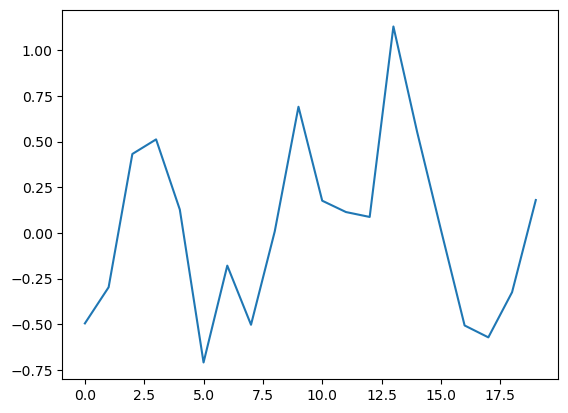

In [44]:
import matplotlib.pyplot as plt
ar=AR(0.8, -0.35, epsilon=epsilon, Y0=[0,0])
ar.simulate_nPeriods(20)
plt.plot(ar.memory)
ar.YPast

In [ ]:
# import AR module
from py.TimeSeries.ar import AR
import numpy as np

def Epsilon(mu, sigma, seed=None):
    def draw(size):
        if seed:
            np.random.seed(seed)
        return np.random.normal(mu, sigma, size)
    return draw
epsilon = Epsilon(0, 0.4)
epsilon_withSeed = Epsilon(0, 0.4, seed=2023)


In [ ]:
'without seed', epsilon(1), epsilon(10)

In [ ]:
'with seed', epsilon_withSeed(1), epsilon_withSeed(10)

> In most application, you should set seed for reproducible results.

In [ ]:
ar = AR(0.8, -0.35, epsilon=epsilon, Y0=[0,0])
ar.simulate_nPeriods(10)
ar.memory

In [ ]:
ar_withSeed = AR(0.8, -0.35, epsilon=epsilon_withSeed, Y0=[0,0])
ar_withSeed.simulate_nPeriods(10)
ar_withSeed.memory

- `from py.TimeSeries.ar import AR` look for `py/TimeSeries.ar.py` file from your current working directory. If you encounter `ModuleNotFoundError`, you can check your current working directory by `os.getcwd()` and make sure you are in the right directory.

In [ ]:
# check current working directory
import os
os.getcwd()

> You can set you current working directory by `os.chdir("path/to/your/directory")` so that `py/TimeSeries/ar.py` can be found under new current working directory.

In [ ]:
# graph the memory using plotly with x starts from 1
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1, len(ar_withSeed.memory)+1), y=ar.memory))


![ar2_10](img/ar2_10.png)

# Random draw with seed

In [ ]:
import random

# Set the initial seed
seed_value = 42


# Generate and print the first random number
print(random.random())

# Store the state of the random number generator
state = random.getstate()

# Continue generating random numbers
# ...

# Restore the state to continue from where we left off
random.setstate(state)

# Generate and print the next random number
print(random.random())


# Exercise Central Limit Theorem

Regarding sample mean, we have LLN:

$$
\bar{X}_n \xrightarrow{p} \mu
$$

where $\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$ and $X_i$ are i.i.d. random variables with mean $\mu$ and variance $\sigma^2$.

And CLT says that the sum of many independent random variables will be approximately normally distributed. In math, 

$$
\frac{1}{\sqrt{n}} \sum_{i=1}^n (X_i - \mu) \xrightarrow{d} N(0, \sigma^2)
$$

where $X_i$ are i.i.d. random variables with mean $\mu$ and variance $\sigma^2$.

In [ ]:
# random draw from an array with replacement
import numpy as np
np.random.choice([2, 4, 7], size=5, replace=True)

# compute mean and variance, std of an array
a = np.array([2, 4, 7])
a.mean()
a.var()
a.std()

## 1 `draw_x`

Create a `draw_x` function that draws from a array of `[2, 7, 13]` with replacement.



In [ ]:
draw_x(10) # return an array of 10 elements drawn from x with replacement

## 2 Sample Mean Prototype

Create a `SampleMean` class prototype that only has `__init__` method which defines at least the following instance attributes:

- `self.mu`
- `self.sigma`
- `self.draw_x`
- `self.memory = []`

In [ ]:
sm = SampleMean(draw_x, mu, sigma)



In [ ]:
def Draw_x(arr, seed=None):
    def draw(size):
        if seed:
            np.random.seed(seed)
        return np.random.choice(arr, size=size, replace=True)
    return draw

In [ ]:
from py.SampleMean.sample_mean import SampleMean

In [ ]:
import numpy as np
arr = np.array([2, 4, 7])
draw_x = Draw_x(arr, seed=29390)

draw_x(10)

# standard deviation of an array
arr.std()

In [ ]:
sm = SampleMean(draw_x, mu=arr.mean(), sigma=arr.std())

## 3

sm.one_sample(n=1000)

will return a tuple of 

$$(\bar{X}_n, \frac{\bar{X}_n - \mu}{\sigma/\sqrt{n}})$$

and add that tuple to `sm.memory` array.

In [ ]:
n = 1000
X = sm.draw_x(n)
one_sample = (X.mean(), (X.mean() - sm.mu)/(sm.sigma/np.sqrt(n)))
# append one_sample as one row to the memory


In [ ]:
sm.memory.append(one_sample)

In [ ]:
sm.memory

In [ ]:
def one_sample(sm, n):
    X = sm.draw_x(n)
    return (X.mean() - sm.mu)/(sm.sigma/np.sqrt(n))